# Crime Data Analysis and prection of total crime rate

# Import Libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import folium        

# District Wise Crime Data from 2001 to 2012


In [2]:
df_dist=pd.read_csv(".\\Documents\\ProjectCrimeDataSet\\crime\\01_District_wise_crimes_committed_IPC_2001_2012.csv",na_values='TOTAL')
df_dist.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [3]:
df_dist0=pd.read_csv(".\\Documents\\ProjectCrimeDataSet\\crime\\01_District_wise_crimes_committed_IPC_2001_2012.csv",na_values='TOTAL')



# Exploratory Data Analysis

In [4]:
df_dist.shape

(9017, 33)

In [5]:
df_dist.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [6]:
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             8609 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [7]:
df_dist.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,...,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,89.28535,78.069646,9.895531,53.041366,0.005767,53.035599,79.152046,58.535433,20.616613,...,25.219918,747.893091,20.228901,100.511257,27.515582,194.122435,0.197849,222.216702,2174.299434,5310.115116
std,3.463623,327.27503,303.446020,59.521657,190.741450,0.115223,190.725474,317.630964,246.937464,88.586415,...,98.880282,3024.106467,96.970466,394.059436,167.237522,831.986594,2.415039,936.002540,7988.438462,18524.381119
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,1.000000,...,2.000000,43.000000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,265.000000,853.000000
50%,2007.000000,38.00000,28.000000,2.000000,20.000000,0.000000,20.000000,25.000000,18.000000,5.000000,...,8.000000,199.000000,5.000000,31.000000,2.000000,47.000000,0.000000,68.000000,745.000000,2096.000000
75%,2010.000000,66.00000,56.000000,6.000000,41.000000,0.000000,41.000000,56.000000,42.000000,13.000000,...,20.000000,529.000000,16.000000,76.000000,13.000000,135.000000,0.000000,177.000000,1608.000000,3972.000000
max,2012.000000,7601.00000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,...,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000


# description for non numerical values

In [8]:
df_dist.describe(include=['object', 'bool'])

,STATE/UT,DISTRICT
count,9017,8609
unique,35,807
top,UTTAR PRADESH,G.R.P.
freq,878,46


# Check for null values

In [9]:
df_dist.isnull().sum()

STATE/UT                                                 0
DISTRICT                                               408
YEAR                                                     0
MURDER                                                   0
ATTEMPT TO MURDER                                        0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER                0
RAPE                                                     0
CUSTODIAL RAPE                                           0
OTHER RAPE                                               0
KIDNAPPING & ABDUCTION                                   0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS              0
KIDNAPPING AND ABDUCTION OF OTHERS                       0
DACOITY                                                  0
PREPARATION AND ASSEMBLY FOR DACOITY                     0
ROBBERY                                                  0
BURGLARY                                                 0
THEFT                                                   

# Heatmap visualization for null values

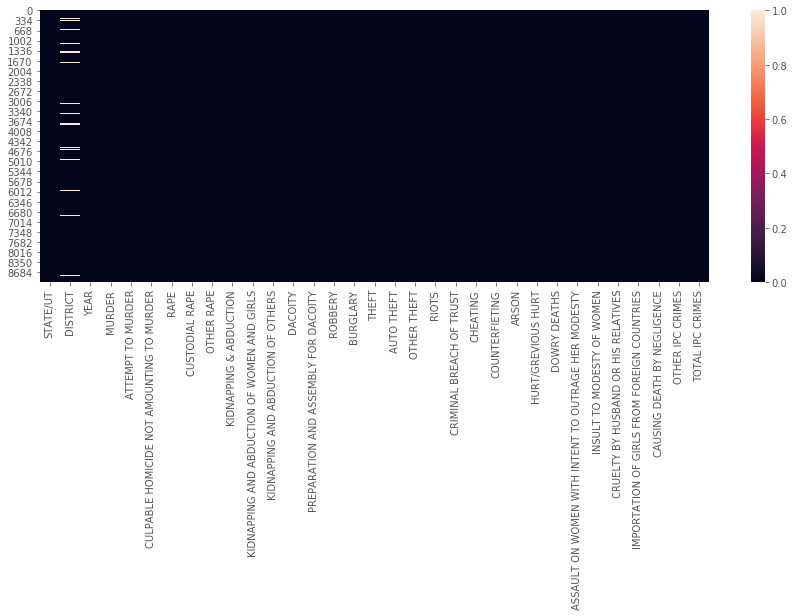

In [10]:
fig=plt.figure(figsize=(15,5))
sns.heatmap(df_dist.isnull())

# Droping null values from data set

In [11]:
df_dist=df_dist.dropna()

In [12]:
df_dist.shape

(8609, 33)

# Indian state's location coordinates

In [13]:
Indian_Cord=pd.read_excel(r".\\Documents\\ProjectCrimeDataSet\\crime\\crime\\Indian Coordinates.xlsx")
Indian_Cord

,STATE/UT,Latitude,Longitude
0,A & N ISLANDS,11.667026,92.735983
1,ANDHRA PRADESH,14.750429,78.570026
2,ARUNACHAL PRADESH,27.100399,93.616601
3,ASSAM,26.749981,94.216667
4,BIHAR,25.785414,87.479973
5,CHANDIGARH,30.719997,76.780006
6,CHHATTISGARH,22.090420,82.159987
7,D & N HAVELI,20.266578,73.016618
8,DELHI UT,28.669993,77.230004
9,GOA,15.491997,73.818001


# states wise group data

In [14]:
data_group=df_dist.groupby('STATE/UT').sum()
data_group.head()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,48161,160,65,21,109,0,109,94,77,17,...,98,1105,6,214,43,121,0,42,4443,9102
ANDHRA PRADESH,718391,31756,22420,1763,13479,2,13477,21239,14936,6303,...,11968,546565,6215,51999,36131,119007,17,138435,482252,2018981
ARUNACHAL PRADESH,367239,841,417,36,500,0,500,857,558,299,...,250,5157,2,784,18,167,0,745,7396,27652
ASSAM,702334,15432,5662,718,16178,5,16173,27939,22920,5019,...,7918,69183,1276,13620,112,39388,8,30205,181354,597764
BIHAR,1059432,41245,40919,3672,13124,2,13122,37220,19389,17831,...,8509,189266,13548,7576,226,25680,440,44442,538591,1346293


In [15]:
data_group.shape

(35, 31)

# Merge dataset and coordinates with respect to states

In [16]:
df_full=pd.merge(Indian_Cord,data_group,on='STATE/UT')
df_full.head()

,STATE/UT,Latitude,Longitude,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,11.667026,92.735983,48161,160,65,21,109,0,109,...,98,1105,6,214,43,121,0,42,4443,9102
1,ANDHRA PRADESH,14.750429,78.570026,718391,31756,22420,1763,13479,2,13477,...,11968,546565,6215,51999,36131,119007,17,138435,482252,2018981
2,ARUNACHAL PRADESH,27.100399,93.616601,367239,841,417,36,500,0,500,...,250,5157,2,784,18,167,0,745,7396,27652
3,ASSAM,26.749981,94.216667,702334,15432,5662,718,16178,5,16173,...,7918,69183,1276,13620,112,39388,8,30205,181354,597764
4,BIHAR,25.785414,87.479973,1059432,41245,40919,3672,13124,2,13122,...,8509,189266,13548,7576,226,25680,440,44442,538591,1346293


# Visualization on Indian MAP

In [17]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')
for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['MURDER'],df_full['STATE/UT']):
    folium.CircleMarker([lat,long],radius=value*0.0008,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.1).add_to(map)

In [18]:
map

# Data PreProcessing and Dimension Reduction

# check for the outliers values

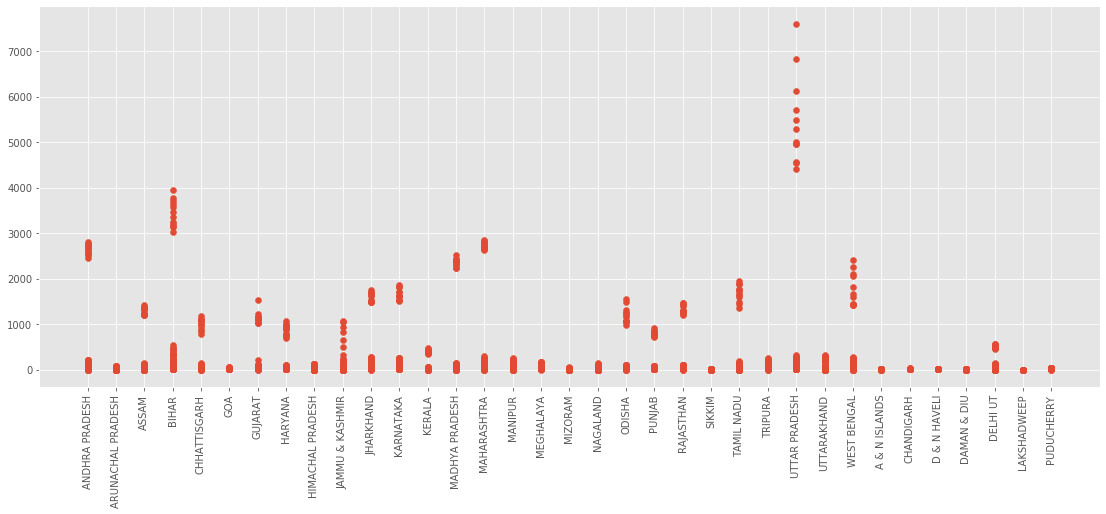

In [19]:
fig = plt.figure(figsize=(19, 7))
plt.scatter(df_dist0['STATE/UT'],df_dist0['MURDER']) #graph between states or UT and murder cases reported in the location
plt.xticks(rotation=90)
plt.show()

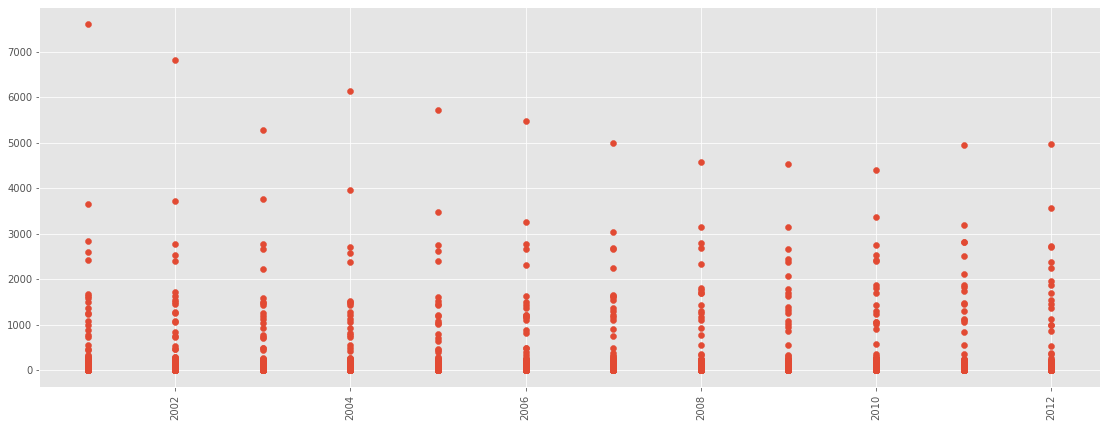

In [20]:
fig = plt.figure(figsize=(19, 7))
plt.scatter(df_dist0['YEAR'],df_dist0['MURDER'])  #graph between states or UT and a perticular year in which cases are reported
plt.xticks(rotation=90)
plt.show()

# Removing outerliers

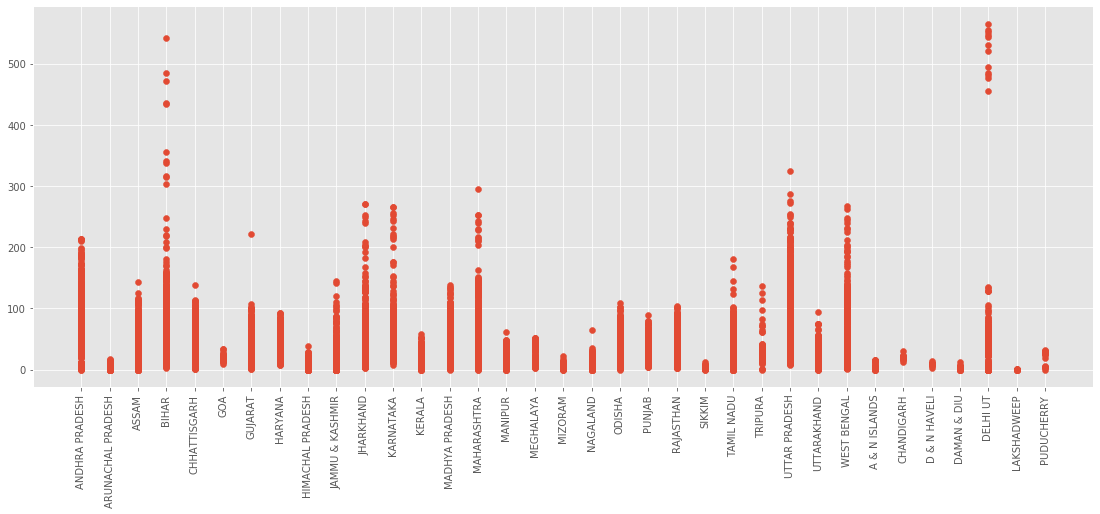

In [21]:
fig = plt.figure(figsize=(19, 7))
plt.scatter(df_dist['STATE/UT'],df_dist['MURDER'])
plt.xticks(rotation=90)
plt.show()

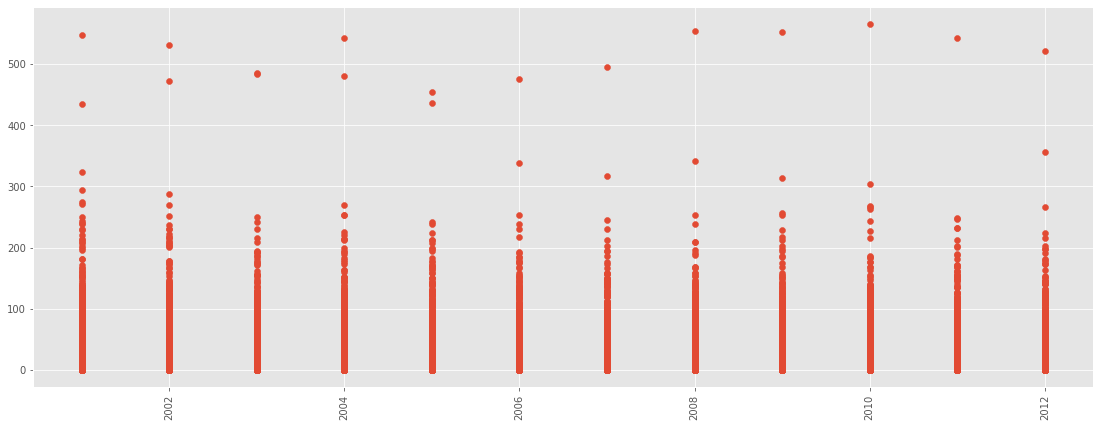

In [22]:
fig = plt.figure(figsize=(19, 7))
plt.scatter(df_dist['YEAR'],df_dist['MURDER'])  #graph between states or UT and a perticular year in which cases are reported
plt.xticks(rotation=90)
plt.show()

# reduce dimenssion and drop some unnecessary columns

In [23]:
df_dist2=df_dist.drop(["STATE/UT","DISTRICT",'YEAR'],axis=1)

In [24]:
df_dist2.head()

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,101,60,17,50,0,50,46,30,16,9,...,30,1131,16,149,34,175,0,181,1518,4154
1,151,125,1,23,0,23,53,30,23,8,...,69,1543,7,118,24,154,0,270,754,4125
2,101,57,2,27,0,27,59,34,25,4,...,38,2088,14,112,83,186,0,404,1262,5818
3,80,53,1,20,0,20,25,20,5,1,...,23,795,17,126,38,57,0,233,1181,3140
4,82,67,1,23,0,23,49,26,23,4,...,41,1244,12,109,58,247,0,431,2313,6507


# Remove some columns that have more zero values

In [25]:
CR=df_dist2[df_dist2['CUSTODIAL RAPE']>0]
CR.head()

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
900,46,25,4,43,1,42,30,21,9,4,...,5,180,9,22,20,193,0,189,564,2096
1100,1,3,0,2,1,1,1,1,0,0,...,0,2,0,0,0,0,0,0,63,409
1323,231,375,18,20,1,19,99,69,30,13,...,5,82,21,35,108,176,0,406,1089,4619
1982,71,279,4,38,1,37,34,0,34,6,...,1,749,18,90,212,159,0,547,1173,8580
2244,59,14,3,20,1,19,47,13,34,15,...,35,201,28,8,0,24,0,52,415,1432


In [26]:
CR.shape #over 9000 rows CUSTODIAL RAPE columns has values more then zeors only in 19 rows so we can remove it 

(19, 30)

In [27]:
IGFC=df_dist2[df_dist2['IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES']>0]
IGFC.head()

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
18,214,95,16,72,0,72,106,83,23,24,...,67,2829,37,113,55,421,7,593,2103,9867
77,66,9,20,20,0,20,84,23,61,8,...,21,842,17,23,0,54,8,41,782,2796
97,153,162,21,73,0,73,113,25,88,32,...,42,103,69,81,0,141,6,141,1867,4212
101,77,54,5,15,0,15,42,1,41,16,...,12,282,17,7,0,13,1,61,555,1515
102,434,581,30,27,0,27,197,11,186,91,...,54,354,90,47,0,152,39,178,2825,8583


In [28]:
IGFC.shape  #over 9000 rows IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES columns has values more then zeors only in 175 rows so we can remove it

(175, 30)

In [29]:
PAFD=df_dist2[df_dist2['PREPARATION AND ASSEMBLY FOR DACOITY']>0]
PAFD.head()

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
6,182,88,2,54,0,54,82,51,31,16,...,43,1792,7,139,129,378,0,369,2426,7848
8,162,85,6,56,0,56,67,49,18,27,...,33,1392,62,414,81,224,0,322,1726,5811
15,89,69,5,46,0,46,90,80,10,12,...,65,1119,10,207,228,287,0,266,1585,5245
18,214,95,16,72,0,72,106,83,23,24,...,67,2829,37,113,55,421,7,593,2103,9867
29,11,2,0,1,0,1,3,2,1,3,...,1,30,0,3,0,0,0,0,54,163


In [30]:
PAFD.shape #we can't PREPARATION AND ASSEMBLY FOR DACOITY columns maybe its have more 6000 rows values zero but still there 3752 non zeros row

(3752, 30)

In [31]:
df_dist3=df_dist2.drop(['CUSTODIAL RAPE','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'],axis=1)
df_dist3.head()

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,...,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,101,60,17,50,50,46,30,16,9,0,...,1,30,1131,16,149,34,175,181,1518,4154
1,151,125,1,23,23,53,30,23,8,0,...,8,69,1543,7,118,24,154,270,754,4125
2,101,57,2,27,27,59,34,25,4,0,...,9,38,2088,14,112,83,186,404,1262,5818
3,80,53,1,20,20,25,20,5,1,0,...,2,23,795,17,126,38,57,233,1181,3140
4,82,67,1,23,23,49,26,23,4,0,...,3,41,1244,12,109,58,247,431,2313,6507


In [32]:
df_dist3.shape

(8609, 28)

# correlation matrix

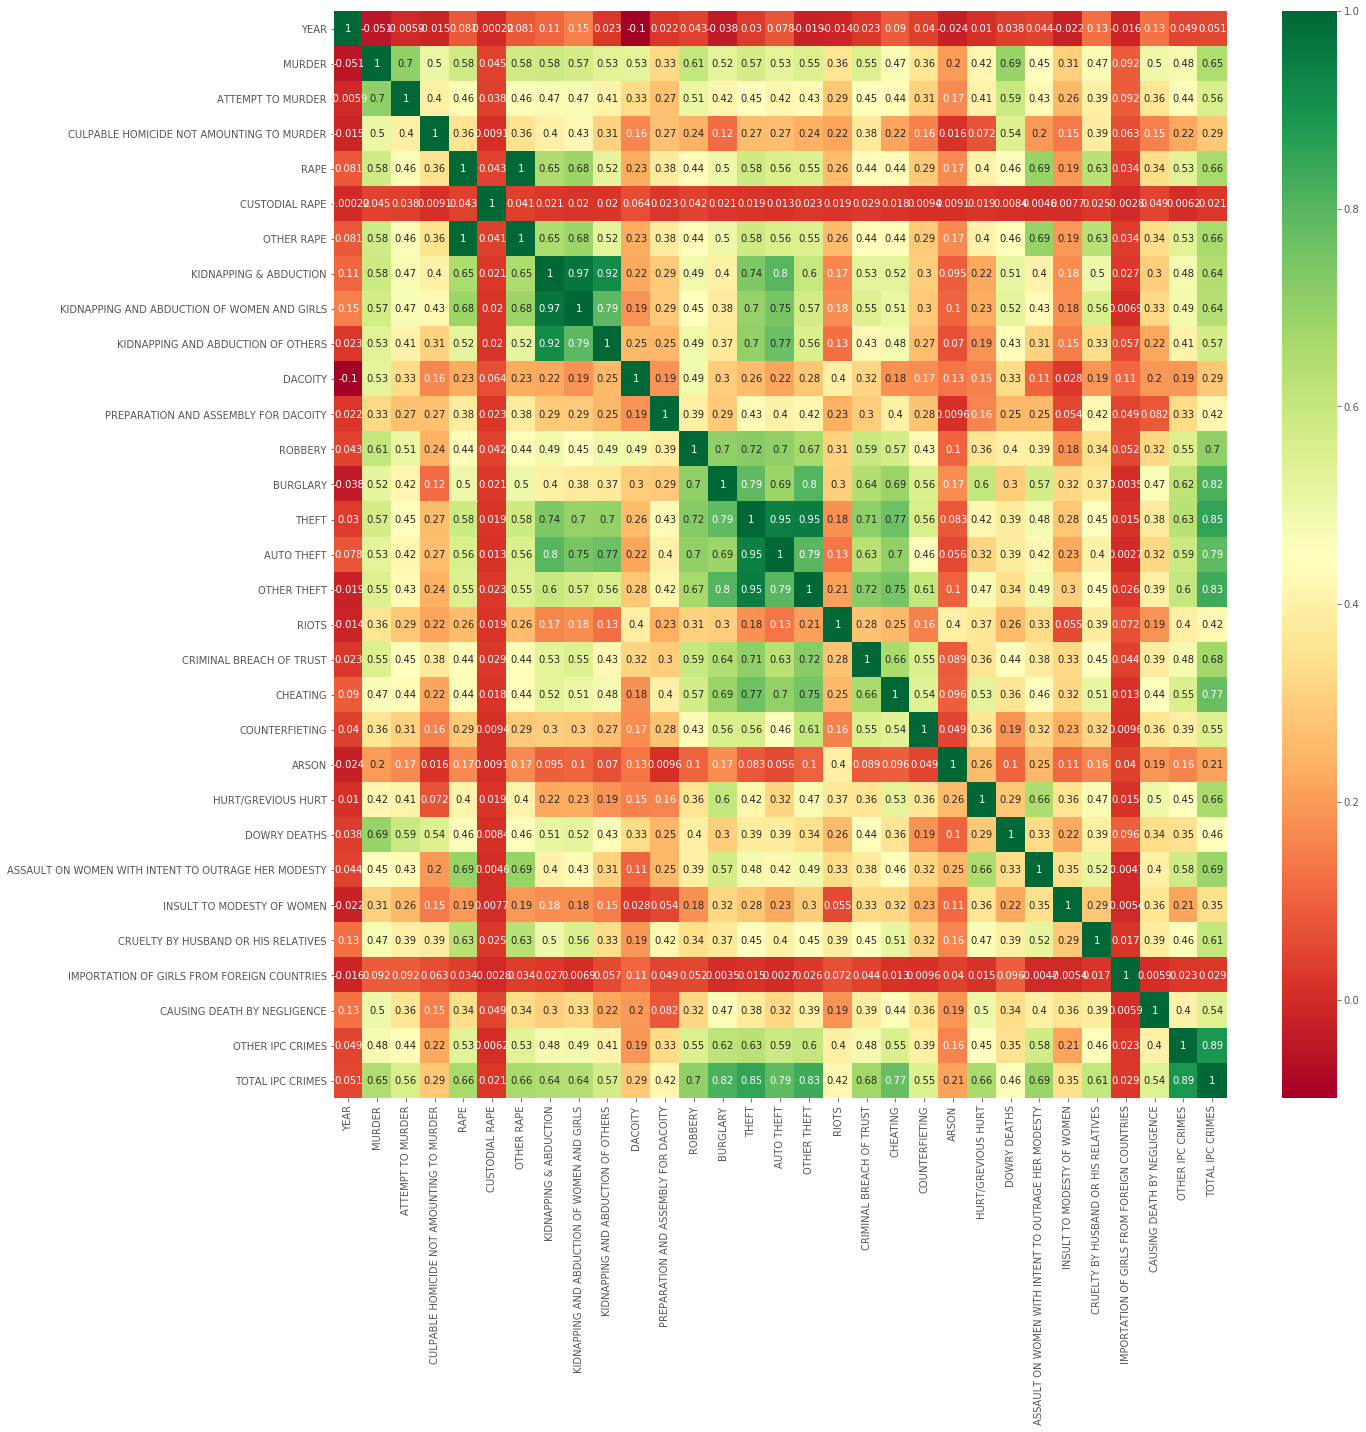

In [33]:
## Correlation
#get correlations of each features in dataset
corrmat = df_dist.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_dist[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [34]:
df_dist.corr()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
YEAR,1.000000,-0.050669,-0.005941,-0.015079,0.081295,-0.000218,0.081303,0.108192,0.152259,0.022803,...,-0.024166,0.010390,0.037725,0.044101,-0.022132,0.127524,-0.015693,0.132264,0.048823,0.051458
MURDER,-0.050669,1.000000,0.704921,0.502386,0.580962,0.045474,0.580916,0.583573,0.567557,0.531971,...,0.198916,0.418754,0.694075,0.449377,0.307490,0.473833,0.092486,0.497184,0.484144,0.648125
ATTEMPT TO MURDER,-0.005941,0.704921,1.000000,0.395573,0.463276,0.037867,0.463236,0.471833,0.473938,0.405845,...,0.167977,0.407575,0.589100,0.432738,0.255455,0.394914,0.091509,0.361357,0.438162,0.561458
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,-0.015079,0.502386,0.395573,1.000000,0.355409,0.009090,0.355421,0.402013,0.426477,0.309244,...,0.016035,0.072337,0.544782,0.195101,0.145058,0.388392,0.062817,0.153369,0.220093,0.289432
RAPE,0.081295,0.580962,0.463276,0.355409,1.000000,0.042923,0.999998,0.654873,0.684736,0.519856,...,0.168074,0.404268,0.460344,0.690953,0.194605,0.630451,0.033516,0.335117,0.532937,0.660772
CUSTODIAL RAPE,-0.000218,0.045474,0.037867,0.009090,0.042923,1.000000,0.040752,0.021021,0.020124,0.019678,...,0.009065,0.018892,0.008360,0.004602,0.007652,0.025040,-0.002764,0.048631,0.006212,0.021469
OTHER RAPE,0.081303,0.580916,0.463236,0.355421,0.999998,0.040752,1.000000,0.654887,0.684754,0.519861,...,0.168069,0.404264,0.460367,0.691006,0.194606,0.630454,0.033525,0.335042,0.532972,0.660786
KIDNAPPING & ABDUCTION,0.108192,0.583573,0.471833,0.402013,0.654873,0.021021,0.654887,1.000000,0.969008,0.917295,...,0.094881,0.223345,0.513528,0.404314,0.178373,0.496305,0.027456,0.302094,0.482108,0.643031
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,0.152259,0.567557,0.473938,0.426477,0.684736,0.020124,0.684754,0.969008,1.000000,0.790496,...,0.102438,0.226867,0.520405,0.430497,0.182031,0.555985,0.006939,0.328951,0.488603,0.637322
KIDNAPPING AND ABDUCTION OF OTHERS,0.022803,0.531971,0.405845,0.309244,0.519856,0.019678,0.519861,0.917295,0.790496,1.000000,...,0.070112,0.188036,0.434314,0.308470,0.148813,0.334262,0.056886,0.218724,0.407681,0.566927


# feature engineering

# we introduce a new column Total crime that is sum of all the crimes happend

In [35]:
 df_dist3['Total Crime']=df_dist3['MURDER']+df_dist3['ATTEMPT TO MURDER']+df_dist3['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER']+df_dist3['RAPE']+df_dist3['OTHER RAPE']+df_dist3['KIDNAPPING & ABDUCTION']+df_dist3['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS']+df_dist3['KIDNAPPING AND ABDUCTION OF OTHERS']+df_dist3['DACOITY']+df_dist3['PREPARATION AND ASSEMBLY FOR DACOITY']+df_dist3['ROBBERY']+df_dist3['BURGLARY']+df_dist3['THEFT']+df_dist3['AUTO THEFT']+df_dist3['OTHER THEFT']+df_dist3['RIOTS']+df_dist3['CRIMINAL BREACH OF TRUST']+df_dist3['CHEATING']+df_dist3['COUNTERFIETING']+df_dist3['ARSON']+df_dist3['HURT/GREVIOUS HURT']+df_dist3['DOWRY DEATHS']+df_dist3['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']+df_dist3['INSULT TO MODESTY OF WOMEN']+df_dist3['CRUELTY BY HUSBAND OR HIS RELATIVES']+df_dist3['CAUSING DEATH BY NEGLIGENCE']

In [36]:
df_dist3.shape

(8609, 29)

# GroupBy Data Visualization

In [37]:
df_dist.groupby('YEAR').sum().head()

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
YEAR,,,,,,,,,,,,,,,,,,,,,
2001,36749,32033,3430,16456,0,16456,24114,15609,8505,6202,...,10584,273498,6964,34626,9836,49308,114,57614,723362,1823692
2002,35821,30820,3692,16776,3,16773,23173,15399,7774,6148,...,11877,266876,6957,34389,10283,49372,76,64460,751173,1829467
2003,33201,26349,4094,16337,1,16336,21148,14093,7055,5331,...,9425,263152,6338,33428,12430,51914,46,61074,720457,1763524
2004,34089,28409,4015,18784,2,18782,24536,16459,8077,5341,...,8675,278648,7152,35168,10131,59375,89,69856,763074,1885633
2005,33174,28498,3642,19017,7,19010,24422,16856,7566,5168,...,8498,272675,6901,34937,10209,59643,150,72332,766276,1878667


In [38]:
df_dist.groupby('YEAR').agg('mean').head()

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
YEAR,,,,,,,,,,,,,,,,,,,,,
2001,53.884164,46.969208,5.029326,24.129032,0.000000,24.129032,35.357771,22.887097,12.470674,9.093842,...,15.519062,401.023460,10.211144,50.771261,14.422287,72.299120,0.167155,84.478006,1060.648094,2674.035191
2002,52.293431,44.992701,5.389781,24.490511,0.004380,24.486131,33.829197,22.480292,11.348905,8.975182,...,17.338686,389.600000,10.156204,50.202920,15.011679,72.075912,0.110949,94.102190,1096.602920,2670.754745
2003,47.840058,37.966859,5.899135,23.540346,0.001441,23.538905,30.472622,20.306916,10.165706,7.681556,...,13.580692,379.181556,9.132565,48.167147,17.910663,74.804035,0.066282,88.002882,1038.122478,2541.100865
2004,49.048921,40.876259,5.776978,27.027338,0.002878,27.024460,35.303597,23.682014,11.621583,7.684892,...,12.482014,400.932374,10.290647,50.601439,14.576978,85.431655,0.128058,100.512230,1097.948201,2713.141007
2005,47.459227,40.769671,5.210300,27.206009,0.010014,27.195994,34.938484,24.114449,10.824034,7.393419,...,12.157368,390.092990,9.872675,49.981402,14.605150,85.326180,0.214592,103.479256,1096.246066,2687.649499


In [39]:
df_dist.groupby('YEAR').agg('count').head()

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
YEAR,,,,,,,,,,,,,,,,,,,,,
2001,682,682,682,682,682,682,682,682,682,682,...,682,682,682,682,682,682,682,682,682,682
2002,685,685,685,685,685,685,685,685,685,685,...,685,685,685,685,685,685,685,685,685,685
2003,694,694,694,694,694,694,694,694,694,694,...,694,694,694,694,694,694,694,694,694,694
2004,695,695,695,695,695,695,695,695,695,695,...,695,695,695,695,695,695,695,695,695,695
2005,699,699,699,699,699,699,699,699,699,699,...,699,699,699,699,699,699,699,699,699,699


# Analysis Based on Graphs 

Text(0.5, 1.0, 'Graph between Murder and total IPCs')

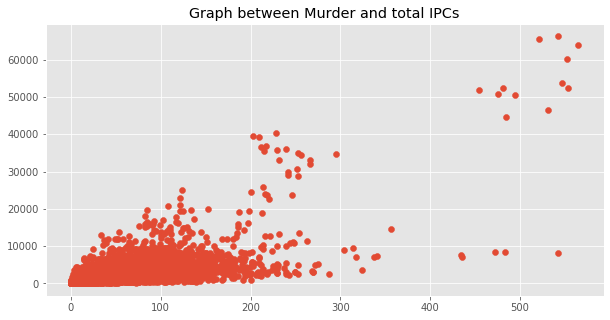

In [40]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(df_dist3['MURDER'],df_dist3['Total Crime'])
plt.title('Graph between Murder and total IPCs')

Text(0.5, 1.0, 'Graph between Murder and State/UT')

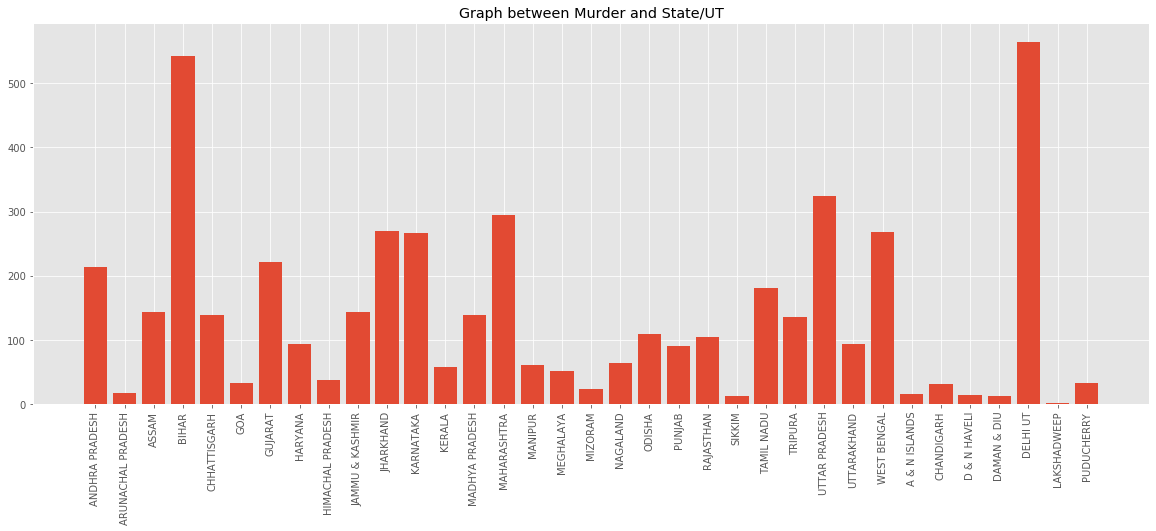

In [41]:
fig2 = plt.figure(figsize=(20, 7))
plt.bar(df_dist['STATE/UT'],df_dist['MURDER'])
plt.xticks(rotation=90)
plt.title('Graph between Murder and State/UT')

Text(0.5, 1.0, 'Graph between Murder and YEAR')

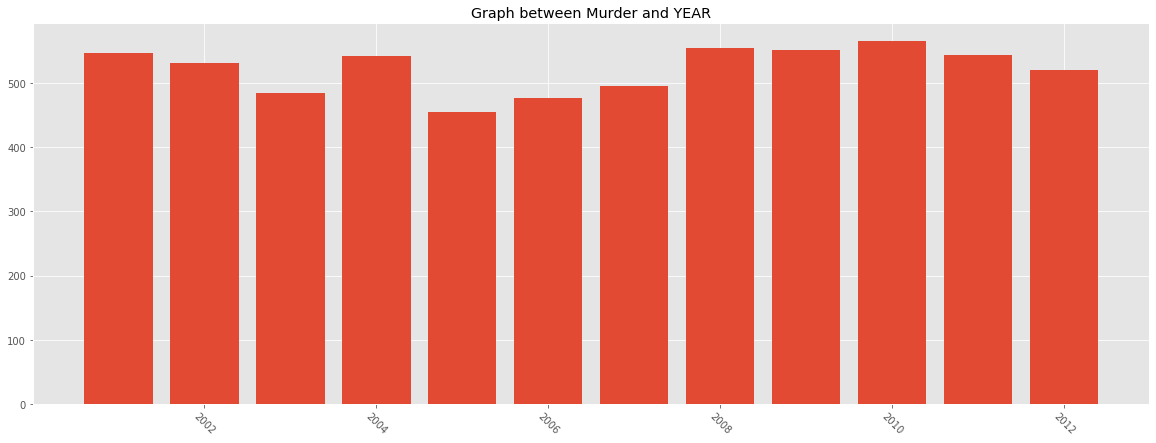

In [42]:
fig2 = plt.figure(figsize=(20, 7))
plt.bar(df_dist['YEAR'],df_dist['MURDER'])
plt.xticks(rotation=-45)
plt.title('Graph between Murder and YEAR')

[]

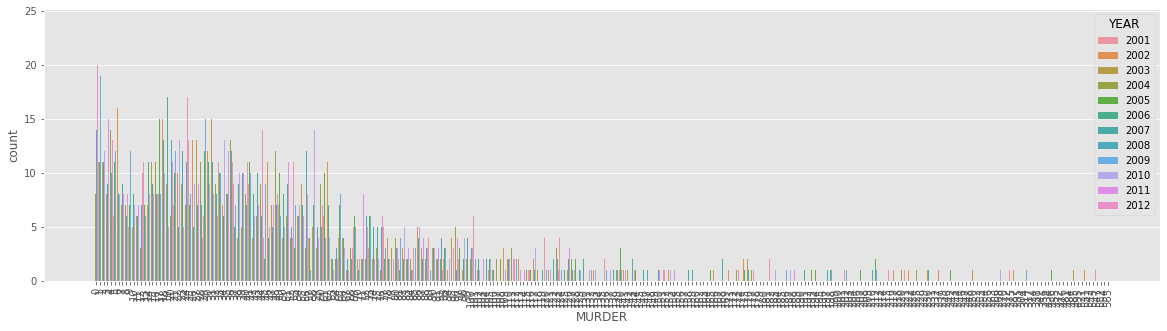

In [43]:
fig=plt.figure(figsize=(20,5))
sns.countplot(x='MURDER',hue='YEAR',data=df_dist)
plt.xticks(rotation=90)
plt.plot()

# Now fit the different regression model and predict the crime rate

# Linear Regression            First model Prediction 

In [44]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

#  Train and Test Data Visualization

# X-train dataset is crime data between 2001 to 2012

In [45]:
X_train = df_dist3.drop(['TOTAL IPC CRIMES','Total Crime','OTHER IPC CRIMES'],axis=1)

In [46]:
len(X_train)

8609

In [47]:
X_train.shape

(8609, 26)

# y_train dataset is Total crime data between 2001 to 2012

In [48]:
y_train=df_dist3['Total Crime']

In [49]:
len(y_train)

8609

In [50]:
y_train.shape

(8609,)

# 2013 crime dataset use as test dataset

In [51]:
data=pd.read_csv(".\\Documents\\ProjectCrimeDataSet\\crime\\01_District_wise_crimes_committed_IPC_2013.csv", na_values='ZZ TOTAL')
data.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,Andhra Pradesh,ADILABAD,2013,96,72,13,61,0,61,65,...,30,2394,12,197,138,464,0,376,1390,6381
1,Andhra Pradesh,ANANTAPUR,2013,156,149,3,28,0,28,110,...,29,2537,23,337,43,161,0,573,1634,6913
2,Andhra Pradesh,CHITTOOR,2013,72,61,2,31,0,31,52,...,18,937,13,119,84,435,0,546,2239,5610
3,Andhra Pradesh,CUDDAPAH,2013,93,107,7,19,0,19,84,...,34,2310,9,318,163,207,0,464,1741,7048
4,Andhra Pradesh,CYBERABAD,2013,162,123,16,138,0,138,192,...,40,4284,43,350,338,1526,0,1104,3139,19992


# feature engineering

In [52]:
 data['Total Crime']=data['MURDER']+data['ATTEMPT TO MURDER']+data['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER']+data['RAPE']+data['OTHER RAPE']+data['KIDNAPPING & ABDUCTION']+data['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS']+data['KIDNAPPING AND ABDUCTION OF OTHERS']+data['DACOITY']+data['PREPARATION AND ASSEMBLY FOR DACOITY']+data['ROBBERY']+data['BURGLARY']+data['THEFT']+data['AUTO THEFT']+data['OTHER THEFT']+data['RIOTS']+data['CRIMINAL BREACH OF TRUST']+data['CHEATING']+data['COUNTERFIETING']+data['ARSON']+data['HURT/GREVIOUS HURT']+data['DOWRY DEATHS']+data['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']+data['INSULT TO MODESTY OF WOMEN']+data['CRUELTY BY HUSBAND OR HIS RELATIVES']+data['CAUSING DEATH BY NEGLIGENCE']

# check for the null values in test dataset

In [53]:
data.isnull().sum()

STATE/UT                                                0
DISTRICT                                               35
YEAR                                                    0
MURDER                                                  0
ATTEMPT TO MURDER                                       0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER               0
RAPE                                                    0
CUSTODIAL RAPE                                          0
OTHER RAPE                                              0
KIDNAPPING & ABDUCTION                                  0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS             0
KIDNAPPING AND ABDUCTION OF OTHERS                      0
DACOITY                                                 0
PREPARATION AND ASSEMBLY FOR DACOITY                    0
ROBBERY                                                 0
BURGLARY                                                0
THEFT                                                   0
AUTO THEFT    

# remove null values from test dataset 

In [54]:
data=data.dropna()
data.shape

(788, 34)

# X_test is prediction crime in  2013 dataset

In [55]:
X_test=data.drop(['STATE/UT','DISTRICT','YEAR','CUSTODIAL RAPE','TOTAL IPC CRIMES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','OTHER IPC CRIMES','Total Crime'],axis=1)
X_test.shape

(788, 26)

# y_test is the actual total crime details in year 2013

In [56]:
y_test=data["Total Crime"]    #  Actual test values
y_test.shape    

(788,)

#  Fitting the Linear Regression Model( as LR )

In [57]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Now Predict the model on Test Data set 

# Here pred variable predicted values of total crime according to our LR model

In [58]:
pred=LR.predict(X_test)             #predicted test values
pred = pred.astype(int)
len(pred)

788

# Accuracy score of Linear regression model

In [59]:
from sklearn.metrics import accuracy_score ,log_loss
accuracy_score(pred,y_test)

0.7588832487309645

# r2 score

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
r2_score(y_test,pred)

0.9999999766159746

In [62]:
len(y_test)

788

# optimal weights 

In [63]:
LR.coef_

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.33333333, 0.66666667, 0.66666667, 1.        , 1.        ,
       1.        , 1.        , 1.33333333, 0.66666667, 0.66666667,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

# data1 is the combine dataset of 2001 to 2012 and 2013

In [64]:
data1=pd.read_csv(".\\Documents\\ProjectCrimeDataSet\\crime\\crime\\Book2.csv", na_values=['TOTAL','ZZ TOTAL'])
data1.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


# Feature Engineering

In [65]:
data1.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [66]:
 data1['Total Crime']=data1['MURDER']+data1['ATTEMPT TO MURDER']+data1['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER']+data1['RAPE']+data1['OTHER RAPE']+data1['KIDNAPPING & ABDUCTION']+data1['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS']+data1['KIDNAPPING AND ABDUCTION OF OTHERS']+data1['DACOITY']+data1['PREPARATION AND ASSEMBLY FOR DACOITY']+data1['ROBBERY']+data1['BURGLARY']+data1['THEFT']+data1['AUTO THEFT']+data1['OTHER THEFT']+data1['RIOTS']+data1['CRIMINAL BREACH OF TRUST']+data1['CHEATING']+data1['COUNTERFIETING']+data1['ARSON']+data1['HURT/GREVIOUS HURT']+data1['DOWRY DEATHS']+data1['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']+data1['INSULT TO MODESTY OF WOMEN']+data1['CRUELTY BY HUSBAND OR HIS RELATIVES']+data1['CAUSING DEATH BY NEGLIGENCE']

In [67]:
data1.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crime
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,2931
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,3813
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,5365
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,2177
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,5287


In [68]:
data1.shape

(9840, 34)

# Null values

In [69]:
data1.isnull().sum()

STATE/UT                                                 0
DISTRICT                                               443
YEAR                                                     0
MURDER                                                   0
ATTEMPT TO MURDER                                        0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER                0
RAPE                                                     0
CUSTODIAL RAPE                                           0
OTHER RAPE                                               0
KIDNAPPING & ABDUCTION                                   0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS              0
KIDNAPPING AND ABDUCTION OF OTHERS                       0
DACOITY                                                  0
PREPARATION AND ASSEMBLY FOR DACOITY                     0
ROBBERY                                                  0
BURGLARY                                                 0
THEFT                                                   

# drop null values

In [70]:
data1=data1.dropna()

# split data into two parts

In [71]:
X2=data1.drop(['STATE/UT','DISTRICT','YEAR','CUSTODIAL RAPE','TOTAL IPC CRIMES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','Total Crime','OTHER IPC CRIMES'],axis=1)
X2.head()

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,...,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE
0,101,60,17,50,50,46,30,16,9,0,...,16,104,1,30,1131,16,149,34,175,181
1,151,125,1,23,23,53,30,23,8,0,...,11,65,8,69,1543,7,118,24,154,270
2,101,57,2,27,27,59,34,25,4,0,...,33,209,9,38,2088,14,112,83,186,404
3,80,53,1,20,20,25,20,5,1,0,...,12,37,2,23,795,17,126,38,57,233
4,82,67,1,23,23,49,26,23,4,0,...,50,220,3,41,1244,12,109,58,247,431


In [72]:
y2=data1['Total Crime']
y2.head()

0    2931
1    3813
2    5365
3    2177
4    5287
Name: Total Crime, dtype: int64

# train test split from sklearn

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X2,y2,test_size=0.2)

In [75]:
len(X1_train)

7517

In [76]:
len(X1_test)

1880

In [77]:
len(y1_train)

7517

In [78]:
len(y1_test)

1880

# Mean Square Error and Co-relation score in linear regression

In [79]:
mean_squared_error(y_test,pred)

0.24111675126903553

# co-relation score

In [80]:
r2_score(y_test,pred)

0.9999999766159746

# DecisionTreeRegressor 

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
DTR=DecisionTreeRegressor()

# fit DecisionTreeRegressor  model

In [83]:
DTR.fit(X1_train,y1_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

# predicting model

In [84]:
pred_DTR=DTR.predict(X_test)
pred_DTR=pred_DTR.astype(int)
len(pred_DTR)

788

In [85]:
pred_DTR1=DTR.predict(X1_test)
pred_DTR1=pred_DTR1.astype(int)
len(pred_DTR1)

1880

#  Accuracy score in DecisionTreeRegressor

# Accuracy in  DecisionTreeRegressor is around 80% , which is good

In [86]:
accuracy_score(pred_DTR,y_test)

0.8197969543147208

# Co-relation score

In [87]:
r2_score(y_test,pred_DTR)

0.9933728044893373

In [88]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(DecisionTreeRegressor(), X_train, y_train, cv=cv)

array([0.97787073, 0.98349961, 0.98000387, 0.98222381, 0.97666294])

# Lasso Regression

In [89]:
from sklearn.linear_model import Lasso
lasso=Lasso()

# fit lasso regression model

In [90]:
lasso.fit(X1_train,y1_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

# predict lasso model

In [91]:
pred_lasso=lasso.predict(X_test)
pred_lasso=pred_lasso.astype(int)
len(pred_lasso)

788

# Lasso Regression accuracy

In [92]:
accuracy_score(pred_lasso,y_test)

0.633248730964467

In [93]:
mean_squared_error(y_test,pred_lasso)

0.467005076142132

# co-relation score

In [94]:
r2_score(y_test,pred_lasso)

0.999999954708835

# KMean Clustering analysis

In [95]:
from sklearn.cluster import KMeans

# Initialize K points

In [96]:
KM=KMeans(n_clusters=28)

In [97]:
KM.fit(df_dist3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=28, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Cluster centre values

In [98]:
KM.cluster_centers_

array([[1.46000000e+02, 1.24000000e+02, 7.27272727e+00, 6.76363636e+01,
        6.76363636e+01, 1.40181818e+02, 7.12727273e+01, 6.89090909e+01,
        1.03636364e+01, 6.36363636e-01, 8.65454545e+01, 1.20581818e+03,
        4.90672727e+03, 1.87772727e+03, 3.02900000e+03, 1.64090909e+02,
        1.26818182e+02, 1.79936364e+03, 2.14545455e+01, 3.92727273e+01,
        4.12245455e+03, 3.89090909e+01, 1.84363636e+02, 2.84545455e+02,
        1.23663636e+03, 6.79000000e+02, 2.51772727e+03, 1.79100000e+04,
        2.05066364e+04],
       [4.42413793e+01, 3.65270936e+01, 5.90147783e+00, 2.63210181e+01,
        2.63193760e+01, 3.43185550e+01, 2.58809524e+01, 8.43760263e+00,
        7.21018062e+00, 2.67241379e+00, 2.19885057e+01, 8.26174056e+01,
        2.04018062e+02, 5.48366174e+01, 1.49181445e+02, 7.34376026e+01,
        1.66272578e+01, 4.42380952e+01, 1.75533662e+00, 1.00706076e+01,
        2.09939245e+02, 1.08054187e+01, 4.07750411e+01, 8.31773399e+00,
        5.82750411e+01, 7.76683087e+01,

In [99]:
print (KM.labels_)
print (len(KM.labels_))

[21  4 23 ...  5 24 21]
8609


In [100]:
print (type(KM.labels_))
unique, counts = np.unique(KM.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 11, 1: 1218, 2: 42, 3: 4, 4: 385, 5: 1587, 6: 15, 7: 34, 8: 634, 9: 66, 10: 180, 11: 10, 12: 91, 13: 8, 14: 2, 15: 346, 16: 29, 17: 17, 18: 24, 19: 33, 20: 726, 21: 560, 22: 130, 23: 196, 24: 1572, 25: 481, 26: 86, 27: 122}


# Analysis different cluster to different dataset columns

C:\Users\Rahul Sain\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


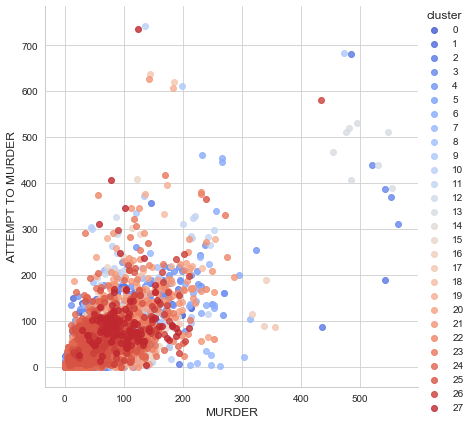

In [101]:
df_dist3['cluster'] = KM.labels_
sns.set_style('whitegrid')
sns.lmplot('MURDER','ATTEMPT TO MURDER',data=df_dist3, hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)

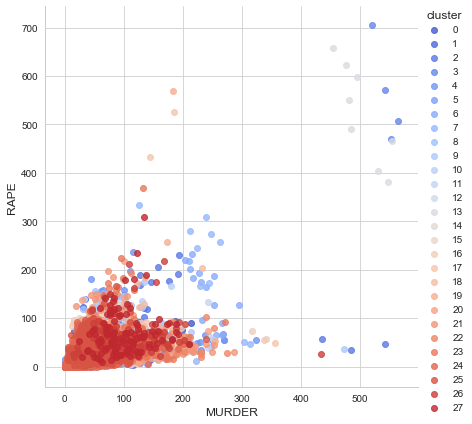

In [102]:
sns.lmplot('MURDER','RAPE',data=df_dist3, hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)

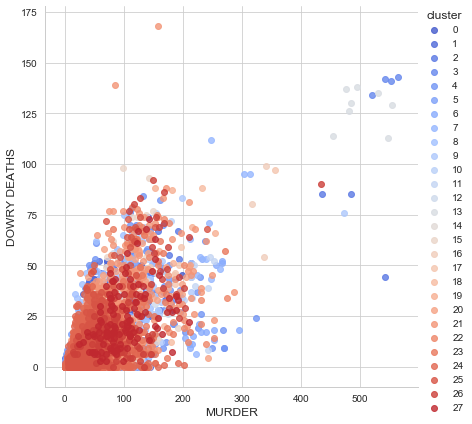

In [103]:
sns.lmplot('MURDER','DOWRY DEATHS',data=df_dist3, hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)

C:\Users\Rahul Sain\anaconda3\lib\site-packages\seaborn\matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


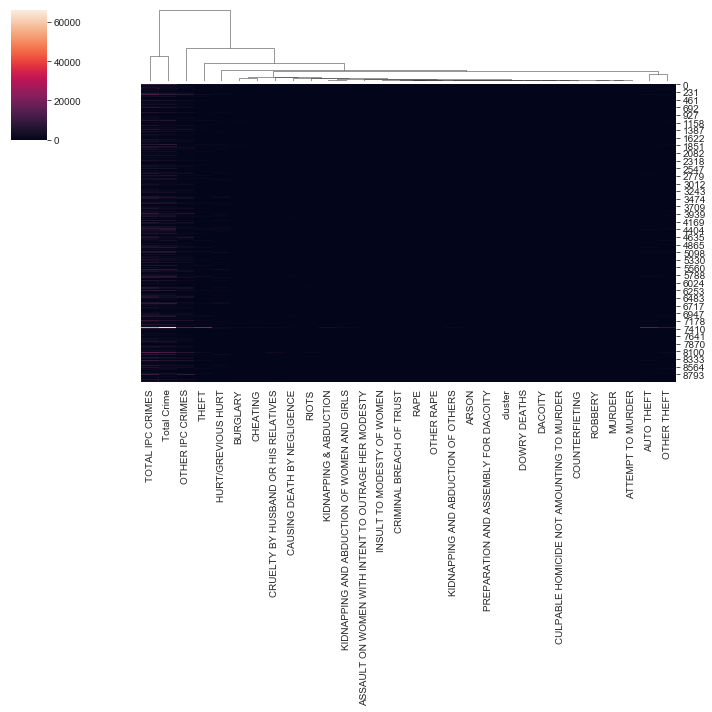

In [104]:
sns.clustermap(df_dist3,row_cluster=False)

# Accuracy score of all model

In [105]:
df11=pd.DataFrame(data={"algorithm" :['linear regression','lasso regression','decision tree regressor'],
                 "accuracy_score" : [accuracy_score(y_test,pred),accuracy_score(pred_lasso,y_test),accuracy_score(pred_DTR,y_test)]
                       ,'r2-score' : [r2_score(y_test,pred),r2_score(y_test,pred_lasso),r2_score(y_test,pred_DTR)]})
df11

,algorithm,accuracy_score,r2-score
0,linear regression,0.758883,1.000000
1,lasso regression,0.633249,1.000000
2,decision tree regressor,0.819797,0.993373


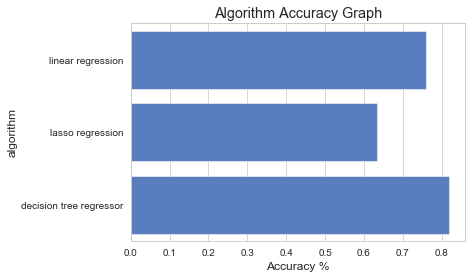

In [106]:
sns.set_color_codes("muted")
sns.barplot(x='accuracy_score', y='algorithm', data=df11, color="b")
plt.xlabel('Accuracy %')
plt.title('Algorithm Accuracy Graph')
plt.show()

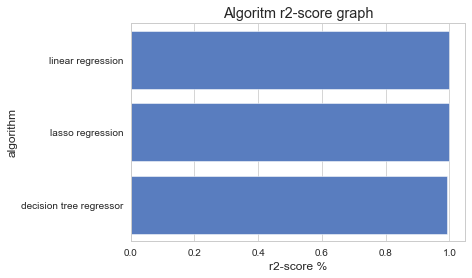

In [107]:
sns.set_color_codes("muted")
sns.barplot(x='r2-score', y='algorithm', data=df11, color="b")
plt.xlabel('r2-score %')
plt.title('Algoritm r2-score graph')
plt.show()